## STEP 2: DATA UNDERSTANDING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\talfi\\python\\dataglacier\\w7\\bank\\bank-full.csv", sep = ";")

In [3]:
row = df.shape[0]
col = df.shape[1]
df.shape

(45211, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


age: (numeric)

job: type of job (categorical)


marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)


education: (categorical)


default: has credit in default? (categorical: 'no','yes','unknown')


housing: has housing loan? (categorical: 'no','yes','unknown')


loan: has personal loan? (categorical: 'no','yes','unknown')


balance: deposit amount (numeric)


contact: contact communication type (categorical: 'cellular','telephone')


month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')




day: last contact day (numeric)


duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)


previous: number of contacts performed before this campaign and for this client (numeric)


poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

deposit: has the client subscribed a term deposit? (binary: 'yes','no')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are no nulls values


In [6]:
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [3]:
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month
df['month'].value_counts().index

Int64Index([5, 7, 8, 6, 11, 4, 2, 1, 10, 9, 3, 12], dtype='int64')

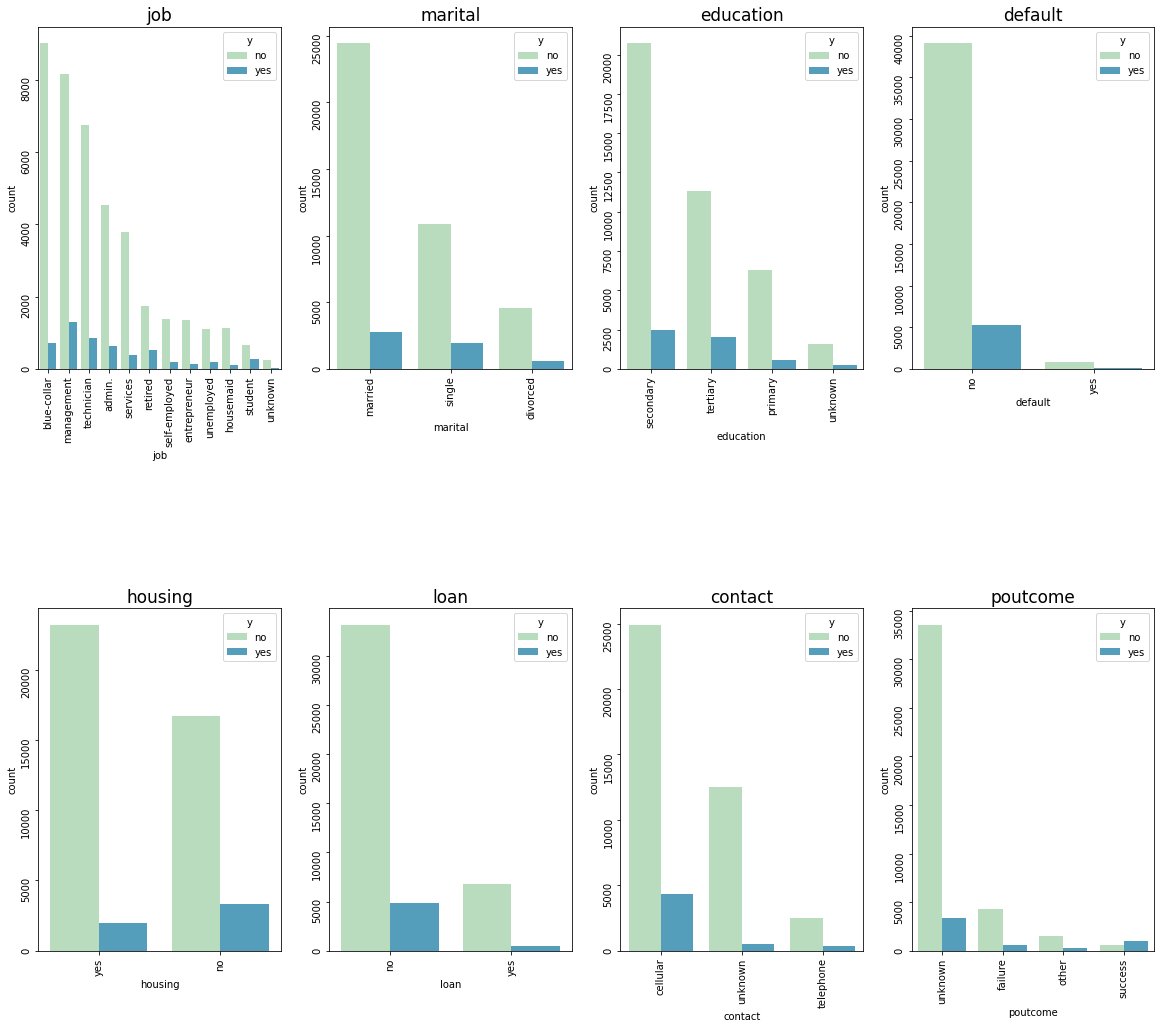

In [21]:
fig, ax = plt.subplots(2,4, figsize=(20,17))
cat = df.select_dtypes('object').columns.to_list()
cat = cat[:-1]

ax = ax.ravel()
position = 0

for i in cat:
    
    order = df[i].value_counts().index
    sns.countplot(data=df, x=i, ax=ax[position], hue='y', palette='GnBu', order=order)
    ax[position].tick_params(labelrotation=90)
    ax[position].set_title(i, fontdict={'fontsize':17})
    
    position += 1

plt.subplots_adjust(hspace=0.7)

plt.show()


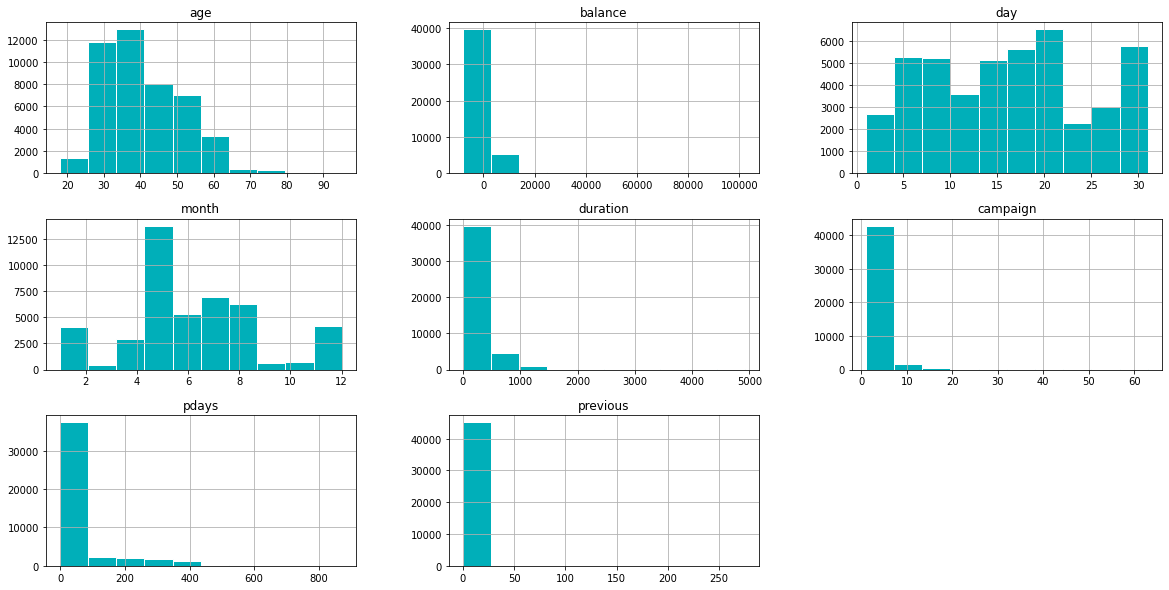

In [23]:
df.hist(figsize=(20,10), edgecolor='white', color='#00afb9')
plt.show()



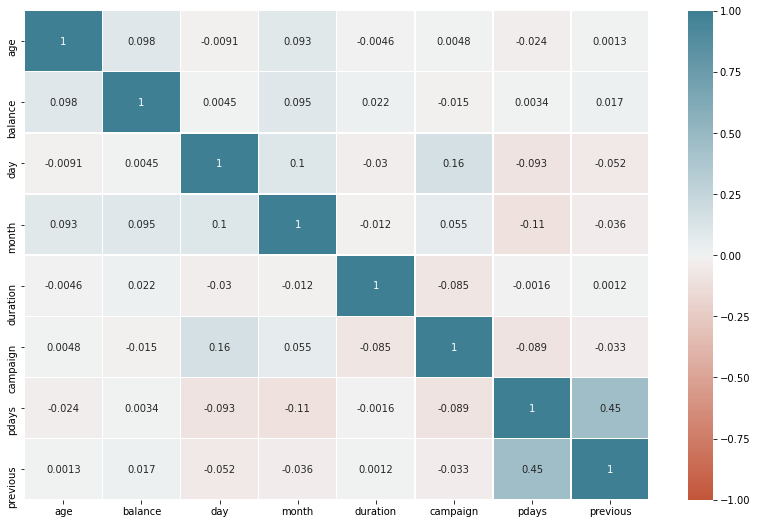

In [25]:
numbers = df.select_dtypes(['int64', 'float64']).columns.to_list()
fig, ax = plt.subplots(figsize=(14,9))
sns.heatmap(df[numbers].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)
plt.show()

## STEP 3: EDA and Feature Engineering

<font color=brown>**df with `duration`column**</font><br>

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no


#### Encoding

In [8]:
# returning object cols
print("Object Columns: ", df.select_dtypes(include = ["object"]).columns)

Object Columns:  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y'],
      dtype='object')


In [9]:
# Splitting object columns for encoding and naming as obj_df
obj_df = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y']]

In [10]:
for i in obj_df:
    i = obj_df[[i]].value_counts()
    print("Unique Values for ",i)

Unique Values for  job          
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
dtype: int64
Unique Values for  marital 
married     27214
single      12790
divorced     5207
dtype: int64
Unique Values for  education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
dtype: int64
Unique Values for  default
no         44396
yes          815
dtype: int64
Unique Values for  housing
yes        25130
no         20081
dtype: int64
Unique Values for  loan
no      37967
yes      7244
dtype: int64
Unique Values for  contact  
cellular     29285
unknown      13020
telephone     2906
dtype: int64
Unique Values for  poutcome
unknown     36959
failure      4901
other        1840
success      1511
dtype: int64
Unique Values for  y  
no     39922
yes     5289
dty

* Let's start to encode with y.
* I am going to encode unknown values as `np.nan`, and later I am going to replace them with the sklearn's `SimpleImputer`

In [13]:
# encoding y
obj_df = obj_df.replace({"y":{"no":0,"yes":1}})
# encoding poutcome
obj_df = obj_df.replace({"poutcome":{"unknown":np.nan,"failure":0, "other":1, "success":2}})
# encoding contact
obj_df = obj_df.replace({"contact":{"cellular":0, "unknown":np.nan, "telephone":1}})
# encoding loan
obj_df = obj_df.replace({"loan":{"no":0,"yes":1}})
# encoding housing
obj_df = obj_df.replace({"housing":{"no":0,"yes":1}})
# encoding default
obj_df = obj_df.replace({"default":{"no":0,"yes":1}})
# encoding education
obj_df = obj_df.replace({"education":{"unknown":np.nan,"secondary":0, "tertiary":1, "primary":2}})
# encoding marital
obj_df = obj_df.replace({"marital":{"married":0, "single":1, "divorced":1}})
# encoding job
obj_df = obj_df.replace({"job":{"unknown":np.nan,"blue-collar":0, "management":1, "technician":2,
                               "admin.":3, "services": 4, "retired": 5, "self-employed":6,
                               "entrepreneur": 7, "unemployed": 8, "housemaid": 9, "student":10}})

In [16]:
print(obj_df.head(3))
obj_df.dtypes

   job  marital  education  default  housing  loan  contact  poutcome  y
0  1.0        0        1.0        0        1     0      NaN       NaN  0
1  2.0        1        0.0        0        1     0      NaN       NaN  0
2  7.0        0        0.0        0        1     1      NaN       NaN  0


job          float64
marital        int64
education    float64
default        int64
housing        int64
loan           int64
contact      float64
poutcome     float64
y              int64
dtype: object

#### Replacing Na Values
* I am going to replace Na values with sklearn's `SimpleImputer` by the most frequent values in each column.(e.g. Na value in education column with secondary)
    * I am doing that way because our data is categorical data. Thus, I can not replace Na values with mean or std because mean & std return float numbers.
    * Replacing the Na values with most frequent values could create outliers; no worries, I am going to get rid of all outliers.


In [17]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imr = imr.fit(obj_df)
imputed_data = imr.transform(obj_df)
obj_df = pd.DataFrame(imputed_data)
# As SimpleImputer removes all column names as indexes, I am going to rename them.
obj_df = obj_df.rename(columns = {0:'job' ,1:'marital' ,2:'education' , 3:'default' ,
                                  4:'housing' , 5:'loan' ,6:'contact'
                                  , 7:'poutcome' , 8:'y' })

In [19]:
print("First 3 rows of  obj_df: ",obj_df.head(3))
print("Is there any Na values in obj_df:", obj_df.isnull().values.any())

First 3 rows of  obj_df:     job  marital  education  default  housing  loan  contact  poutcome    y
0  1.0      0.0        1.0      0.0      1.0   0.0      0.0       0.0  0.0
1  2.0      1.0        0.0      0.0      1.0   0.0      0.0       0.0  0.0
2  7.0      0.0        0.0      0.0      1.0   1.0      0.0       0.0  0.0
Is there any Na values in obj_df: False


* Now, it is time to join obj_df with df. As we have unencoded versions of obj_df in df, I am going to drop those columns.

In [23]:
# dropping encoded columns
df = df.drop(columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y'])
df.dtypes

age         int64
balance     int64
day         int64
month       int64
duration    int64
campaign    int64
pdays       int64
previous    int64
dtype: object

In [57]:
# joining df & obj_df
rawy= df.join(obj_df)
print("Is there any Na values in rawy: ", rawy.isnull().values.any())
print("Shape of rawy: ", rawy.shape)
rawy.head(3)

Is there any Na values in rawy:  False
Shape of rawy:  (45211, 17)


,age,balance,day,month,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,poutcome,y
0,58,2143,5,5,261,1,-1,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,44,29,5,5,151,1,-1,0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,33,2,5,5,76,1,-1,0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


#### Feature Scaling
* As our data has strict upper & lower bounds, I am going to use Normalization instaad of standardization.
* Standardization also scales the data in it's original shape. This is the other reason for using scaling because our data is categorical data & I am going to apply classification algorithm to our data. In that case, standardization will prevent bias.
* As y is the target variable, I am going to remove y for feature scaling. 

In [58]:
#removing y
raw = rawy.drop(columns="y")


**Normalization**

In [60]:
from sklearn.preprocessing import MinMaxScaler# a.k.a. Normalization
scaler = MinMaxScaler()
scaler.fit(raw)
raw_normalize = scaler.transform(raw)
raw_normalized = pd.DataFrame(raw_normalize)

#### Transformation
* For transformation purposes, I am going to use Log Transformation

In [61]:
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()
log.fit(raw_normalized)
raw_transformalize = log.transform(raw_normalize)
raw_transformalized = pd.DataFrame(raw_transformalize)

In [62]:
raw_transformalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.484740,0.918253,-1.333228,-0.444966,0.421659,-1.037276,-0.467895,-0.469277,-0.567670,-0.813212,0.888372,-0.13549,0.893915,-0.436803,-0.262091,-0.282936
1,0.429975,-0.752042,-1.333228,-0.444966,-0.338211,-1.037276,-0.467895,-0.469277,0.020550,1.229691,-0.880131,-0.13549,0.893915,-0.436803,-0.262091,-0.282936
2,-0.722011,-0.781658,-1.333228,-0.444966,-1.047380,-1.037276,-0.467895,-0.469277,1.506937,-0.813212,-0.880131,-0.13549,0.893915,2.289359,-0.262091,-0.282936
3,0.688427,0.528783,-1.333228,-0.444966,-0.880257,-1.037276,-0.467895,-0.469277,-1.356792,-0.813212,-0.880131,-0.13549,0.893915,-0.436803,-0.262091,-0.282936
4,-0.722011,-0.782760,-1.333228,-0.444966,0.021445,-1.037276,-0.467895,-0.469277,-1.356792,1.229691,-0.880131,-0.13549,-1.118674,-0.436803,-0.262091,-0.282936


* Normalization & Transformation removed the column names. Let's rename them.

In [43]:
raw.columns

Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'poutcome', 'y'],
      dtype='object')

In [63]:
raw_transformalized = raw_transformalized.rename(columns = {0:'age' ,1:'balance' ,2:'day' ,3:'month' ,
                                                           4:'duration' ,5:'campaign' ,6:'pdays' ,7:'previous' ,
                                                           8:'job' ,9:'marital' ,10:'education' ,11:'default' ,
                                                           12:'housing' ,13:'loan' ,14:'contact' ,15:'poutcome'})

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>],
       [<AxesSubplot:title={'center':'job'}>,
        <AxesSubplot:title={'center':'marital'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'default'}>],
       [<AxesSubplot:title={'center':'housing'}>,
        <AxesSubplot:title={'center':'loan'}>,
        <AxesSubplot:title={'center':'contact'}>,
        <AxesSubplot:title={'center':'poutcome'}>]], dtype=object)

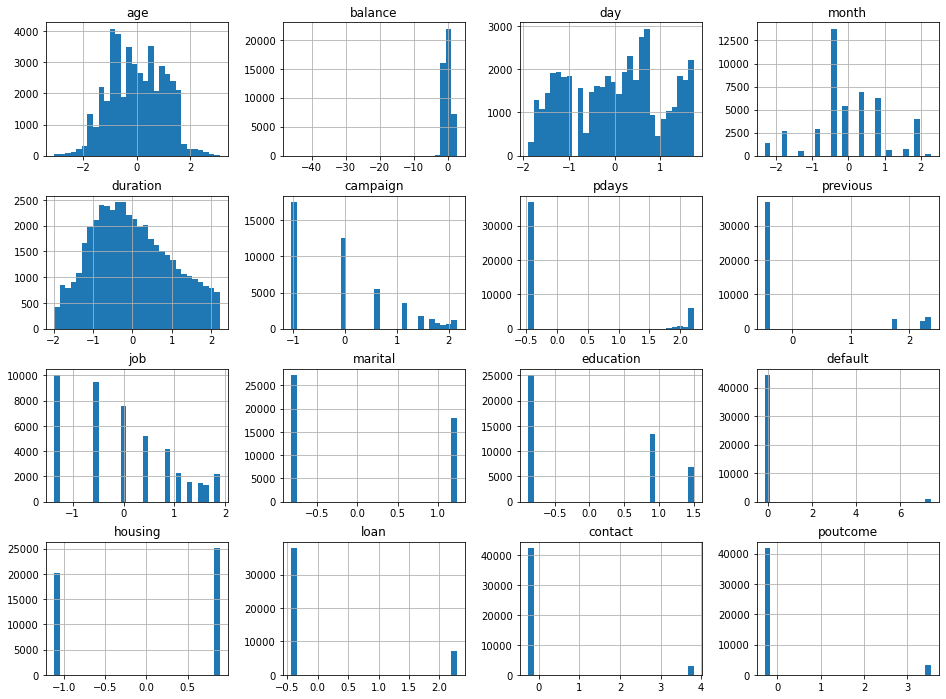

In [64]:
raw_transformalized.hist(bins = 30, figsize = (16,12))

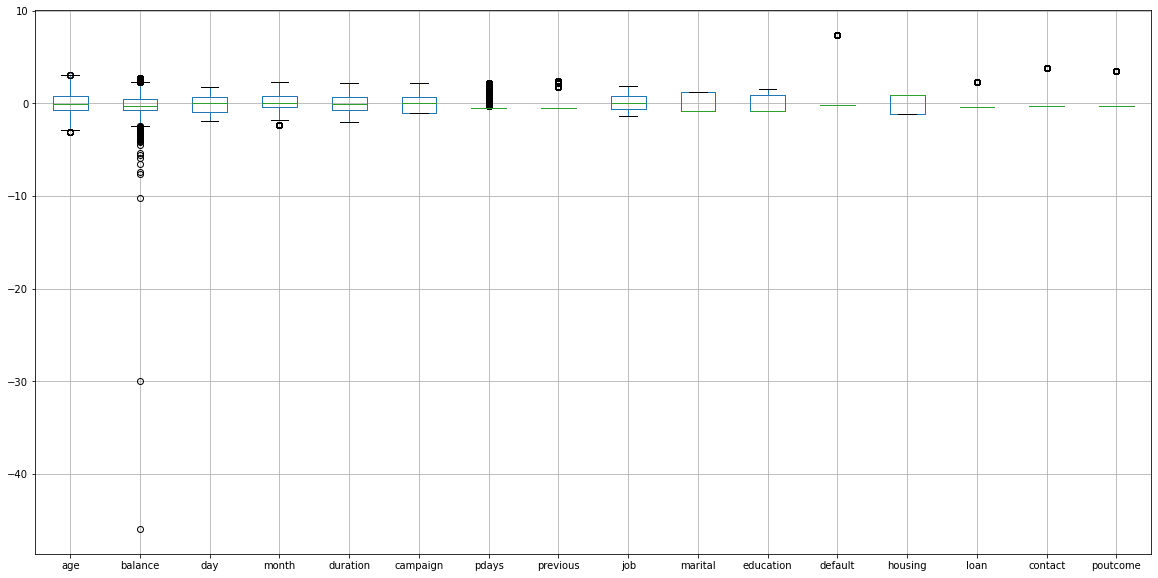

In [66]:
raw_transformalized.boxplot(figsize = (20,10))
plt.show()

* There are huge outliers in our df. Now, it is time to remove them.

#### Removing Outliers

In [161]:
y = pd.DataFrame(rawy["y"])
banking = raw_transformalized.join(y)

In [162]:
for i in banking:
    y = banking["y"]
    mean = banking[i].mean()
    std = banking[i].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    if banking[i] is y:
        continue
    banking = banking[(banking[i] < upper) & (banking[i] > lower)]

In [160]:
banking.shape

(38435, 17)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>],
       [<AxesSubplot:title={'center':'job'}>,
        <AxesSubplot:title={'center':'marital'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'default'}>],
       [<AxesSubplot:title={'center':'housing'}>,
        <AxesSubplot:title={'center':'loan'}>,
        <AxesSubplot:title={'center':'contact'}>,
        <AxesSubplot:title={'center':'poutcome'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

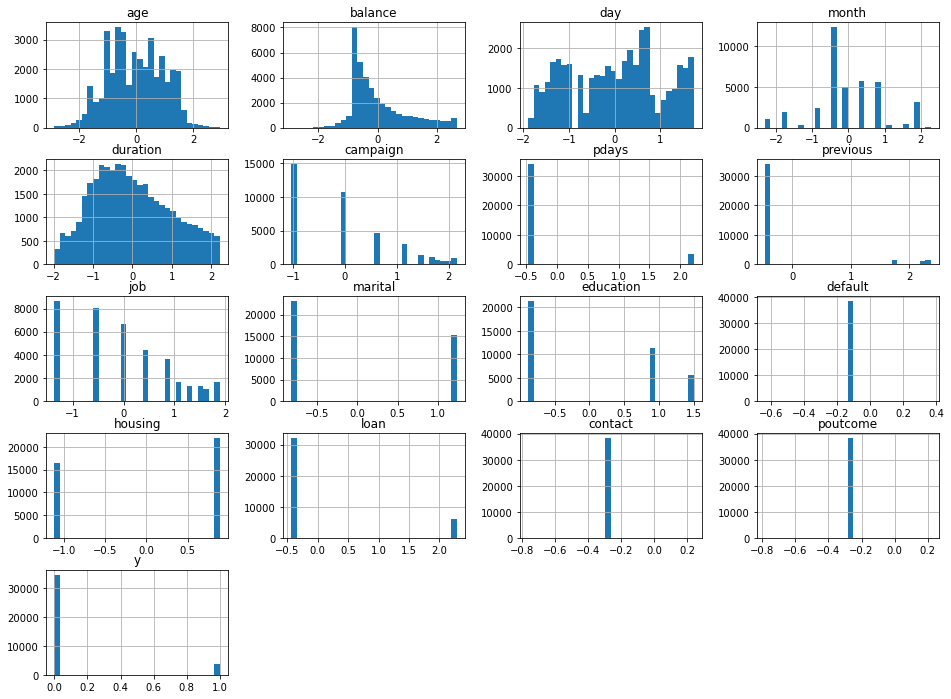

In [164]:
banking.hist(bins = 30, figsize= (16,12))